In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

# 1. Preprocessing

In [ ]:
import missingno as msno
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='NanumBarunGothic')

import seaborn as sns

import folium

In [ ]:
dfs = pd.read_csv("/content/drive/MyDrive/Dacon/해양/해양정보.csv")
dfs = dfs.drop("Unnamed: 0", axis=1)
dfs

,id,수온,염분,용존무기질,암모니아성,아질산성질,수소이온농,부유물질,규산염,화학적산소,...,분급,IL,AVS,TOC,출현 종수,서식밀도,생체량,다양도,ISEP,target
0,316,26.545851,32.309583,66.104868,14.319576,6.972082,8.971575,11.728246,304.869238,1.931958,...,2.240928,3.902331,0.012846,0.575771,13,1073,150.599923,1.716036,4.175251,0
1,317,26.554848,32.349542,64.474188,14.589719,6.735795,9.020834,11.714478,305.679106,1.920418,...,2.225997,3.869125,0.012892,0.569858,13,1101,147.291657,1.708048,4.208229,0
2,401,23.993582,31.361310,27.374896,12.254332,2.251062,8.153433,7.006110,156.534014,1.819130,...,1.632856,2.946323,0.006347,0.383279,13,1043,314.840727,1.745837,4.040576,0
3,402,24.128544,31.392720,40.357462,18.472264,3.081622,8.146589,7.890393,197.425405,1.868407,...,1.756812,3.134258,0.007535,0.411179,13,1047,341.836530,1.777640,3.969894,0
4,403,24.307723,31.448773,57.618235,26.818344,4.176601,8.137937,9.054508,253.578305,1.938230,...,1.827487,3.242570,0.008644,0.427284,14,1073,371.648822,1.815197,3.888848,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,24081,25.851886,33.253367,159.641510,74.357581,8.735472,8.070027,37.725838,373.821118,1.447972,...,2.278679,4.148814,0.017251,0.586218,12,1911,354.587269,1.607382,4.237762,0
1395,24255,25.894292,33.064516,138.494067,62.239657,7.511863,8.118775,28.153697,342.306087,1.406727,...,2.252678,4.115956,0.016743,0.580026,12,1820,345.025454,1.611839,4.212133,0
1396,24260,25.857437,33.283780,151.143962,69.175223,8.155382,8.087579,34.285327,360.565348,1.346410,...,2.274175,4.146499,0.017121,0.585546,12,1886,351.880468,1.608239,4.230977,0
1397,24434,25.877573,33.207776,124.338925,54.974428,6.756500,8.123419,25.826087,316.492313,1.396592,...,2.249135,4.113549,0.016644,0.579423,12,1800,342.911197,1.612521,4.207032,0


In [ ]:
# dfs.to_csv("해양정보.csv")

In [ ]:
dfs1 = pd.read_csv("/content/drive/MyDrive/Dacon/해양/격자(4단계)_화학적산소요구량.csv", encoding = "euc-kr")
dfs1 = dfs1.groupby("id").mean().reset_index()
dfs1


,id,left,top,right,bottom,화학적산소
0,316,126.075,34.450,126.100,34.425,1.931958
1,317,126.075,34.425,126.100,34.400,1.920418
2,401,126.100,36.800,126.125,36.775,1.819130
3,402,126.100,36.775,126.125,36.750,1.868407
4,403,126.100,36.750,126.125,36.725,1.938230
...,...,...,...,...,...,...
1394,24081,129.400,35.500,129.425,35.475,1.447972
1395,24255,129.425,35.625,129.450,35.600,1.406727
1396,24260,129.425,35.500,129.450,35.475,1.346410
1397,24434,129.450,35.625,129.475,35.600,1.396592


In [ ]:
df = pd.merge(dfs, dfs1.drop(["화학적산소","right","bottom"], axis=1), how='outer',on='id')
df

,id,수온,염분,용존무기질,암모니아성,아질산성질,수소이온농,부유물질,규산염,화학적산소,...,AVS,TOC,출현 종수,서식밀도,생체량,다양도,ISEP,target,left,top
0,316,26.545851,32.309583,66.104868,14.319576,6.972082,8.971575,11.728246,304.869238,1.931958,...,0.012846,0.575771,13,1073,150.599923,1.716036,4.175251,0,126.075,34.450
1,317,26.554848,32.349542,64.474188,14.589719,6.735795,9.020834,11.714478,305.679106,1.920418,...,0.012892,0.569858,13,1101,147.291657,1.708048,4.208229,0,126.075,34.425
2,401,23.993582,31.361310,27.374896,12.254332,2.251062,8.153433,7.006110,156.534014,1.819130,...,0.006347,0.383279,13,1043,314.840727,1.745837,4.040576,0,126.100,36.800
3,402,24.128544,31.392720,40.357462,18.472264,3.081622,8.146589,7.890393,197.425405,1.868407,...,0.007535,0.411179,13,1047,341.836530,1.777640,3.969894,0,126.100,36.775
4,403,24.307723,31.448773,57.618235,26.818344,4.176601,8.137937,9.054508,253.578305,1.938230,...,0.008644,0.427284,14,1073,371.648822,1.815197,3.888848,0,126.100,36.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,24081,25.851886,33.253367,159.641510,74.357581,8.735472,8.070027,37.725838,373.821118,1.447972,...,0.017251,0.586218,12,1911,354.587269,1.607382,4.237762,0,129.400,35.500
1395,24255,25.894292,33.064516,138.494067,62.239657,7.511863,8.118775,28.153697,342.306087,1.406727,...,0.016743,0.580026,12,1820,345.025454,1.611839,4.212133,0,129.425,35.625
1396,24260,25.857437,33.283780,151.143962,69.175223,8.155382,8.087579,34.285327,360.565348,1.346410,...,0.017121,0.585546,12,1886,351.880468,1.608239,4.230977,0,129.425,35.500
1397,24434,25.877573,33.207776,124.338925,54.974428,6.756500,8.123419,25.826087,316.492313,1.396592,...,0.016644,0.579423,12,1800,342.911197,1.612521,4.207032,0,129.450,35.625


# 2. EDA

<ipython-input-8-d93ee8faa294>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


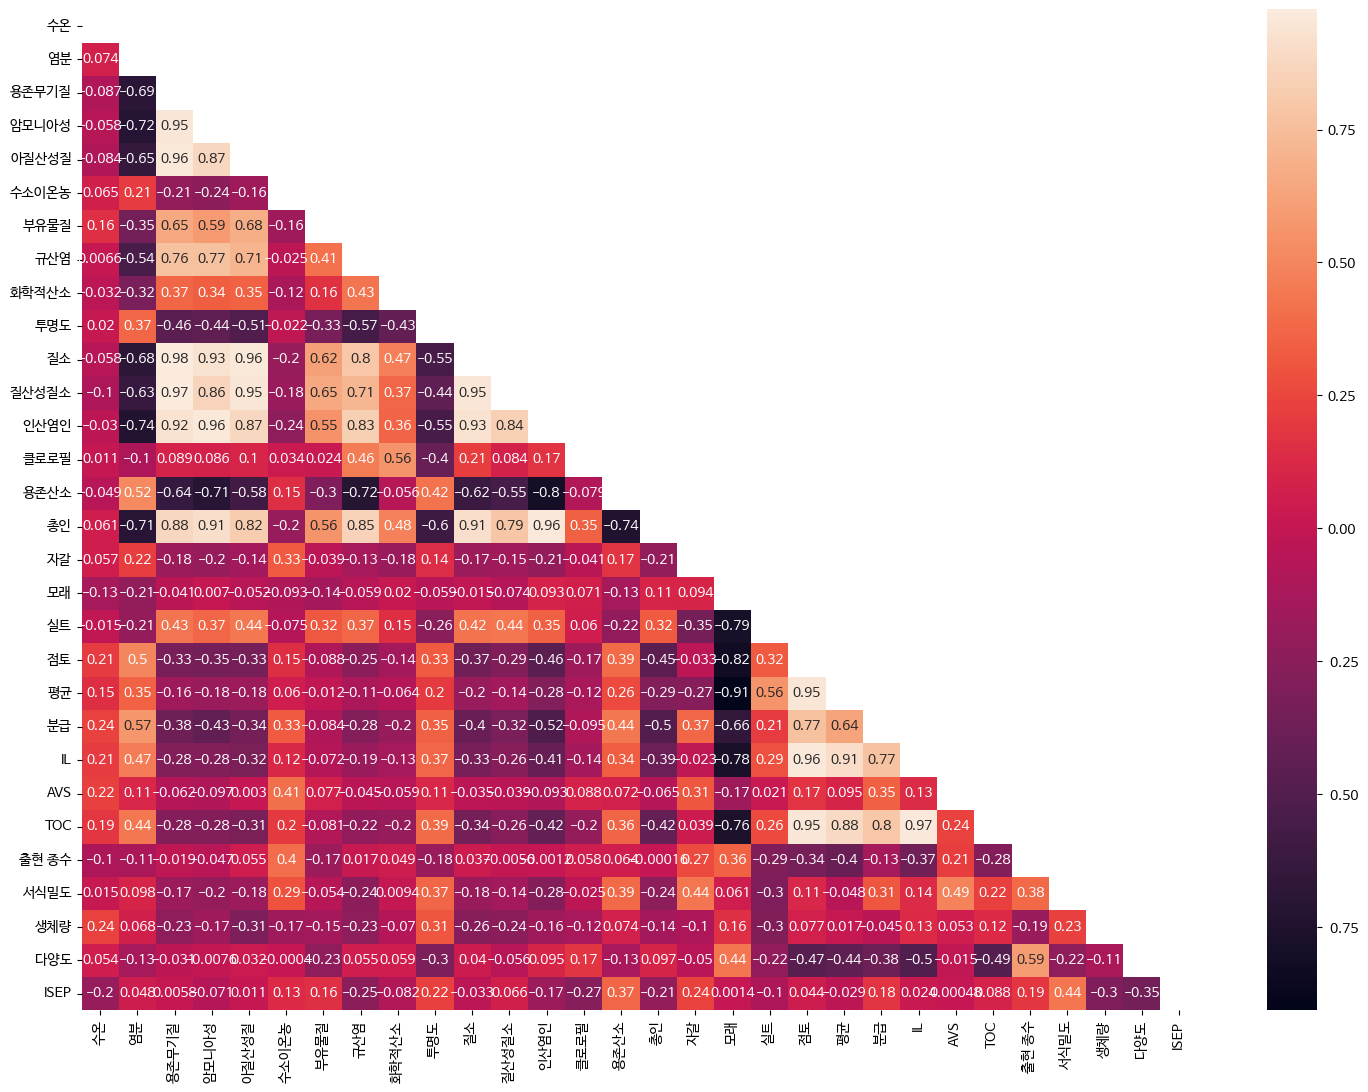

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

df_corr = df.drop(columns=['id', 'left','top', 'target'],axis=1)
scaler= MinMaxScaler()
df_corr[df_corr.columns] = scaler.fit_transform(df_corr[df_corr.columns])
corr = df_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(18,13))
sns.heatmap(data = df_corr.corr(), annot=True, mask=mask)

In [ ]:
corr = df_corr.corr(method='pearson')
corr_unstack = corr.unstack()
df_temp = pd.DataFrame(corr_unstack['화학적산소'].sort_values(ascending=False), columns=['COD'])
df_temp.style.background_gradient(cmap='Blues')

,COD
화학적산소,1.000000
클로로필,0.558253
총인,0.482285
질소,0.469735
규산염,0.428771
용존무기질,0.367860
질산성질소,0.367663
인산염인,0.359678
아질산성질,0.352422
암모니아성,0.338660


In [ ]:
df_corr = df_corr.drop(["부유물질", "실트", "다양도", "출현 종수", "모래", "서식밀도", "수온", "용존산소", "AVS", "평균", "생체량", "ISEP", "수소이온농", "IL", "점토", "자갈", "분급","TOC"], axis=1)

In [ ]:
df_corr

,염분,용존무기질,암모니아성,아질산성질,규산염,화학적산소,투명도,질소,질산성질소,인산염인,클로로필,총인
0,0.874278,0.070029,0.047354,0.115016,0.157550,0.351556,0.179959,0.174565,0.076880,0.116979,0.168033,0.180867
1,0.877626,0.068006,0.048350,0.110846,0.158033,0.348369,0.187885,0.171915,0.073884,0.115594,0.167288,0.179408
2,0.794831,0.021972,0.039735,0.031699,0.069234,0.320398,0.153606,0.093557,0.019465,0.086292,0.235498,0.120569
3,0.797463,0.038081,0.062674,0.046357,0.093580,0.334006,0.154491,0.111288,0.030135,0.115196,0.232383,0.155659
4,0.802159,0.059499,0.093463,0.065681,0.127013,0.353288,0.157202,0.135319,0.044194,0.154347,0.228771,0.204324
...,...,...,...,...,...,...,...,...,...,...,...,...
1394,0.953350,0.186092,0.268842,0.146136,0.198603,0.217898,0.241922,0.195247,0.134053,0.280017,0.156220,0.307045
1395,0.937527,0.159851,0.224138,0.124542,0.179840,0.206508,0.346393,0.177331,0.119998,0.241713,0.103871,0.255470
1396,0.955897,0.175548,0.249724,0.135899,0.190711,0.189850,0.290568,0.186505,0.129131,0.266580,0.122177,0.284208
1397,0.949530,0.142287,0.197335,0.111211,0.164471,0.203709,0.367253,0.160056,0.108948,0.213003,0.098762,0.226912


#  3. Modeling

## Cluster

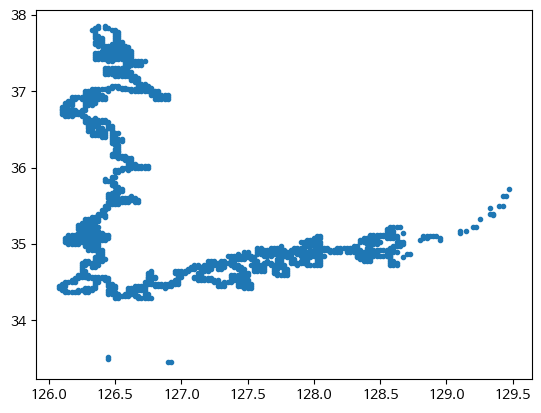

In [ ]:
xy = df.iloc[:, [-2,-1]]

plt.scatter(xy.iloc[:,0], xy.iloc[:, 1], marker='.')

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
k_range = range(2,15)
inertia_arr = []

for k in k_range:
  Kmeans = KMeans(n_clusters=k, random_state=200)
  Kmeans.fit(xy)
  interia = Kmeans.inertia_

  print('k :', k, 'inertia: ', interia)
  inertia_arr.append(interia)

inertia_arr = np.array(inertia_arr)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

k : 2 inertia:  902.5265679480351
k : 3 inertia:  388.28215789194167
k : 4 inertia:  280.6205156205236
k : 5 inertia:  192.19773502841866
k : 6 inertia:  140.19209607675162
k : 7 inertia:  114.08881510891655
k : 8 inertia:  89.91923541031575
k : 9 inertia:  77.51698235964224


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

k : 10 inertia:  66.2169324486415
k : 11 inertia:  56.686906440623886
k : 12 inertia:  49.312071622782405
k : 13 inertia:  44.304322483791665
k : 14 inertia:  40.39608892414437


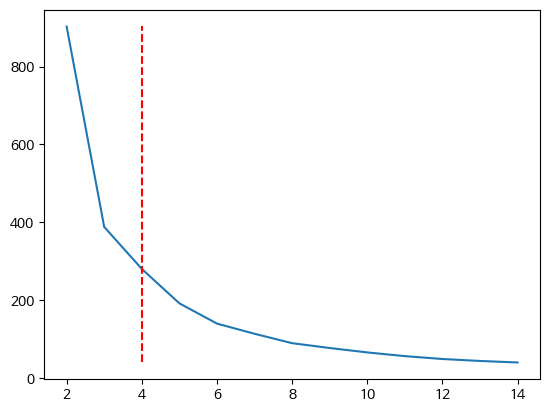

In [ ]:
plt.plot(k_range, inertia_arr)
# plt.vlines(3, ymin=inertia_arr.min()*0.9999, ymax=inertia_arr.max()*1.0003, linestyles='--', colors='g')
plt.vlines(4, ymin=inertia_arr.min()*0.9999, ymax=inertia_arr.max()*1.0003, linestyles='--', colors='r')

In [ ]:
from sklearn.metrics import silhouette_score

k_range = range(2,30)

best_n = -1
best_silhouette_score = -1

for k in k_range:
  kmeans = KMeans(n_clusters = k, random_state= 200)
  kmeans.fit(xy)
  clusters = kmeans.predict(xy)

  score = silhouette_score(xy, clusters)
  print('k:', k, 'score:',score)

  if score > best_silhouette_score:
    best_n = k
    best_silhouette_score = score

print('best_n: ', best_n, 'best_score: ', best_silhouette_score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 2 score: 0.5895124497895551
k: 3 score: 0.5947937878473976
k: 4 score: 0.5591627652611073


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 5 score: 0.5202881403902392
k: 6 score: 0.5145307751496229


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 7 score: 0.504982449198146
k: 8 score: 0.503911985014191


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 9 score: 0.4955879673326639
k: 10 score: 0.4998398638310357


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 11 score: 0.49915437139554186
k: 12 score: 0.5051554638426128


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 13 score: 0.4837449410369642
k: 14 score: 0.49221496150431776


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 15 score: 0.4842884527387871
k: 16 score: 0.4608218987091132


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 17 score: 0.470849049587076
k: 18 score: 0.4497887536739905


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 19 score: 0.44989830022375515
k: 20 score: 0.4660757848063106


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 21 score: 0.45132034569280444
k: 22 score: 0.445616423138177


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 23 score: 0.4477164044484938
k: 24 score: 0.4429838150904931


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 25 score: 0.44509633354141087
k: 26 score: 0.43745162222900685


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 27 score: 0.44049717738347927
k: 28 score: 0.44186907222929406


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 29 score: 0.4386194403969956
best_n:  3 best_score:  0.5947937878473976


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


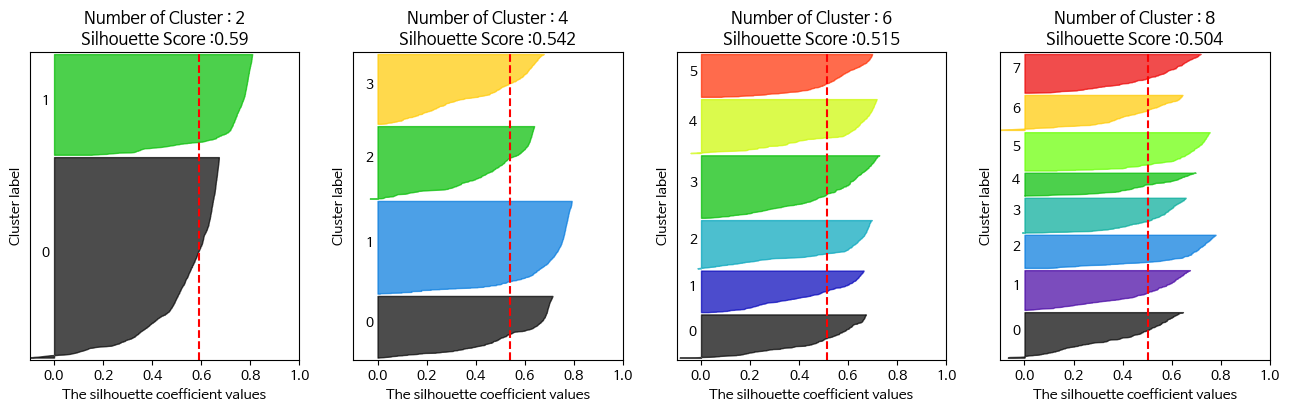

In [ ]:
def visualize_silhouette(cluster_lists, X_features):



    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

visualize_silhouette([ 2, 4, 6, 8], xy)

In [ ]:
# 실루엣 계수 적용
kmeans = KMeans(n_clusters = 6, random_state= 200)
kmeans.fit(xy)
clusters = kmeans.predict(xy)

df['label'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


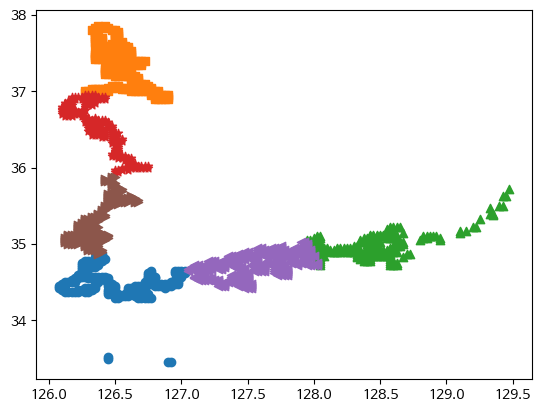

In [ ]:
# 시각화

marker0 = df[df['label'] == 0].index
marker1 = df[df['label'] == 1].index
marker2 = df[df['label'] == 2].index
marker3 = df[df['label'] == 3].index
marker4 = df[df['label'] == 4].index
marker5 = df[df['label'] == 5].index
# marker6 = df[df['label'] == 6].index
# marker7 = df[df['label'] == 7].index

plt.scatter(x=df.iloc[marker0, [-3]], y=df.iloc[marker0, [-2]], marker='o')
plt.scatter(x=df.iloc[marker1, [-3]], y=df.iloc[marker1, [-2]], marker='s')
plt.scatter(x=df.iloc[marker2, [-3]], y=df.iloc[marker2, [-2]], marker='^')
plt.scatter(x=df.iloc[marker3, [-3]], y=df.iloc[marker3, [-2]], marker='*')
plt.scatter(x=df.iloc[marker4, [-3]], y=df.iloc[marker4, [-2]], marker='<')
plt.scatter(x=df.iloc[marker5, [-3]], y=df.iloc[marker5, [-2]], marker='>')
# plt.scatter(x=df.iloc[marker6, [2]], y=df.iloc[marker6, [3]], marker='d')
# plt.scatter(x=df.iloc[marker7, [2]], y=df.iloc[marker7, [3]], marker='4')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [ ]:
df

,id,수온,염분,용존무기질,암모니아성,아질산성질,수소이온농,부유물질,규산염,화학적산소,...,TOC,출현 종수,서식밀도,생체량,다양도,ISEP,target,left,top,label
0,316,26.545851,32.309583,66.104868,14.319576,6.972082,8.971575,11.728246,304.869238,1.931958,...,0.575771,13,1073,150.599923,1.716036,4.175251,0,126.075,34.450,0
1,317,26.554848,32.349542,64.474188,14.589719,6.735795,9.020834,11.714478,305.679106,1.920418,...,0.569858,13,1101,147.291657,1.708048,4.208229,0,126.075,34.425,0
2,401,23.993582,31.361310,27.374896,12.254332,2.251062,8.153433,7.006110,156.534014,1.819130,...,0.383279,13,1043,314.840727,1.745837,4.040576,0,126.100,36.800,3
3,402,24.128544,31.392720,40.357462,18.472264,3.081622,8.146589,7.890393,197.425405,1.868407,...,0.411179,13,1047,341.836530,1.777640,3.969894,0,126.100,36.775,3
4,403,24.307723,31.448773,57.618235,26.818344,4.176601,8.137937,9.054508,253.578305,1.938230,...,0.427284,14,1073,371.648822,1.815197,3.888848,0,126.100,36.750,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,24081,25.851886,33.253367,159.641510,74.357581,8.735472,8.070027,37.725838,373.821118,1.447972,...,0.586218,12,1911,354.587269,1.607382,4.237762,0,129.400,35.500,2
1395,24255,25.894292,33.064516,138.494067,62.239657,7.511863,8.118775,28.153697,342.306087,1.406727,...,0.580026,12,1820,345.025454,1.611839,4.212133,0,129.425,35.625,2
1396,24260,25.857437,33.283780,151.143962,69.175223,8.155382,8.087579,34.285327,360.565348,1.346410,...,0.585546,12,1886,351.880468,1.608239,4.230977,0,129.425,35.500,2
1397,24434,25.877573,33.207776,124.338925,54.974428,6.756500,8.123419,25.826087,316.492313,1.396592,...,0.579423,12,1800,342.911197,1.612521,4.207032,0,129.450,35.625,2


In [ ]:
df_last = df.drop(["부유물질", "실트", "다양도", "출현 종수", "모래", "서식밀도", "수온", "용존산소", "AVS", "평균", "생체량", "ISEP", "수소이온농", "IL", "점토", "자갈", "분급","TOC"], axis=1)
df_last

,id,염분,용존무기질,암모니아성,아질산성질,규산염,화학적산소,투명도,질소,질산성질소,인산염인,클로로필,총인,target,left,top,label
0,316,32.309583,66.104868,14.319576,6.972082,304.869238,1.931958,2.790455,272.383688,44.815842,9.331653,4.019110,27.490904,0,126.075,34.450,0
1,317,32.349542,64.474188,14.589719,6.735795,305.679106,1.920418,2.876130,269.993845,43.152740,9.233325,4.005505,27.347223,0,126.075,34.425,0
2,401,31.361310,27.374896,12.254332,2.251062,156.534014,1.819130,2.505587,199.351734,12.946135,7.153619,5.250224,21.553917,0,126.100,36.800,3
3,402,31.392720,40.357462,18.472264,3.081622,197.425405,1.868407,2.515155,215.336463,18.868906,9.205096,5.193382,25.008886,0,126.100,36.775,3
4,403,31.448773,57.618235,26.818344,4.176601,253.578305,1.938230,2.544460,237.001430,26.672222,11.983862,5.127471,29.800420,0,126.100,36.750,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,24081,33.253367,159.641510,74.357581,8.735472,373.821118,1.447972,3.460256,291.028784,76.550833,20.903526,3.803539,39.914300,0,129.400,35.500,2
1395,24255,33.064516,138.494067,62.239657,7.511863,342.306087,1.406727,4.589568,274.876625,68.749385,18.184812,2.848259,34.836293,0,129.425,35.625,2
1396,24260,33.283780,151.143962,69.175223,8.155382,360.565348,1.346410,3.986115,283.147370,73.818543,19.949766,3.182314,37.665814,0,129.425,35.500,2
1397,24434,33.207776,124.338925,54.974428,6.756500,316.492313,1.396592,4.815051,259.302857,62.615926,16.147080,2.755035,32.024458,0,129.450,35.625,2


In [ ]:
total = df_last.copy()#.drop(["수심", "수소이온농도", "용존산소", "인산염인", "아질산성질소"], axis = 1)
target = total.loc[:, ['화학적산소']]
# feature = total.iloc[:, 4:]
feature=total.drop(['id', 'left', 'top', '화학적산소'], axis = 1)


In [ ]:
feature

,염분,용존무기질,암모니아성,아질산성질,규산염,투명도,질소,질산성질소,인산염인,클로로필,총인,target,label
0,32.309583,66.104868,14.319576,6.972082,304.869238,2.790455,272.383688,44.815842,9.331653,4.019110,27.490904,0,0
1,32.349542,64.474188,14.589719,6.735795,305.679106,2.876130,269.993845,43.152740,9.233325,4.005505,27.347223,0,0
2,31.361310,27.374896,12.254332,2.251062,156.534014,2.505587,199.351734,12.946135,7.153619,5.250224,21.553917,0,3
3,31.392720,40.357462,18.472264,3.081622,197.425405,2.515155,215.336463,18.868906,9.205096,5.193382,25.008886,0,3
4,31.448773,57.618235,26.818344,4.176601,253.578305,2.544460,237.001430,26.672222,11.983862,5.127471,29.800420,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,33.253367,159.641510,74.357581,8.735472,373.821118,3.460256,291.028784,76.550833,20.903526,3.803539,39.914300,0,2
1395,33.064516,138.494067,62.239657,7.511863,342.306087,4.589568,274.876625,68.749385,18.184812,2.848259,34.836293,0,2
1396,33.283780,151.143962,69.175223,8.155382,360.565348,3.986115,283.147370,73.818543,19.949766,3.182314,37.665814,0,2
1397,33.207776,124.338925,54.974428,6.756500,316.492313,4.815051,259.302857,62.615926,16.147080,2.755035,32.024458,0,2


In [ ]:
feature.iloc[:, :-2]

,염분,용존무기질,암모니아성,아질산성질,규산염,투명도,질소,질산성질소,인산염인,클로로필,총인
0,32.309583,66.104868,14.319576,6.972082,304.869238,2.790455,272.383688,44.815842,9.331653,4.019110,27.490904
1,32.349542,64.474188,14.589719,6.735795,305.679106,2.876130,269.993845,43.152740,9.233325,4.005505,27.347223
2,31.361310,27.374896,12.254332,2.251062,156.534014,2.505587,199.351734,12.946135,7.153619,5.250224,21.553917
3,31.392720,40.357462,18.472264,3.081622,197.425405,2.515155,215.336463,18.868906,9.205096,5.193382,25.008886
4,31.448773,57.618235,26.818344,4.176601,253.578305,2.544460,237.001430,26.672222,11.983862,5.127471,29.800420
...,...,...,...,...,...,...,...,...,...,...,...
1394,33.253367,159.641510,74.357581,8.735472,373.821118,3.460256,291.028784,76.550833,20.903526,3.803539,39.914300
1395,33.064516,138.494067,62.239657,7.511863,342.306087,4.589568,274.876625,68.749385,18.184812,2.848259,34.836293
1396,33.283780,151.143962,69.175223,8.155382,360.565348,3.986115,283.147370,73.818543,19.949766,3.182314,37.665814
1397,33.207776,124.338925,54.974428,6.756500,316.492313,4.815051,259.302857,62.615926,16.147080,2.755035,32.024458


## MinMaxScaler

In [ ]:
feature_scaled

,염분,용존무기질,암모니아성,아질산성질,규산염,투명도,질소,질산성질소,인산염인,클로로필,총인,target
0,32.309583,66.104868,14.319576,6.972082,304.869238,2.790455,272.383688,44.815842,9.331653,4.019110,27.490904,0
1,32.349542,64.474188,14.589719,6.735795,305.679106,2.876130,269.993845,43.152740,9.233325,4.005505,27.347223,0
2,31.361310,27.374896,12.254332,2.251062,156.534014,2.505587,199.351734,12.946135,7.153619,5.250224,21.553917,0
3,31.392720,40.357462,18.472264,3.081622,197.425405,2.515155,215.336463,18.868906,9.205096,5.193382,25.008886,0
4,31.448773,57.618235,26.818344,4.176601,253.578305,2.544460,237.001430,26.672222,11.983862,5.127471,29.800420,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1394,33.253367,159.641510,74.357581,8.735472,373.821118,3.460256,291.028784,76.550833,20.903526,3.803539,39.914300,0
1395,33.064516,138.494067,62.239657,7.511863,342.306087,4.589568,274.876625,68.749385,18.184812,2.848259,34.836293,0
1396,33.283780,151.143962,69.175223,8.155382,360.565348,3.986115,283.147370,73.818543,19.949766,3.182314,37.665814,0
1397,33.207776,124.338925,54.974428,6.756500,316.492313,4.815051,259.302857,62.615926,16.147080,2.755035,32.024458,0


In [ ]:
feature_scaled = feature#.iloc[:, :-2]

# 스케일 작업
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = MinMaxScaler()

feature_train = scaler.fit_transform(feature_scaled)
feature_train = pd.DataFrame(feature_train, columns=feature_scaled.columns)

# feature_train['label'] = feature['label']
# feature_train['target'] = feature['target']

## PCA


다중공선성이 우려되는 변수끼리 PCA를 진행하였는데, 예측 성능이 더 낮아진다면 PCA를 적용하지 않는 것이 좋을 수 있습니다. PCA는 변수들 간의 상관 관계를 고려하여 차원을 축소하는 기법이지만, 예측 모델에 적용할 때 모든 경우에 성능 향상을 보장하지는 않습니다.

예측 성능이 더 낮아지는 경우, 다음과 같은 이유가 있을 수 있습니다:

정보 손실: PCA는 변수들을 변환하고 차원을 축소하는 과정에서 일부 정보가 손실될 수 있습니다. 이 때, 예측에 유용한 정보가 손실되어 성능이 저하될 수 있습니다.
다중공선성 해소의 한계: PCA는 다중공선성을 해소하기 위해 변수들 간의 선형 관계를 변환하는 방식으로 작동합니다. 하지만 다중공선성이 복잡한 비선형 관계로 이루어진 경우에는 PCA가 적합하지 않을 수 있습니다.
따라서, PCA를 사용하여 변수를 축소하는 것이 예측 성능 향상에 도움이 되지 않는다면, PCA를 적용하지 않고 원래 변수를 사용하는 것이 더 나은 선택일 수 있습니다. 또는 다른 변수 선택 방법이나 다중공선성 처리 방법을 고려해볼 수도 있습니다.






<ipython-input-24-d9936121d8f6>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


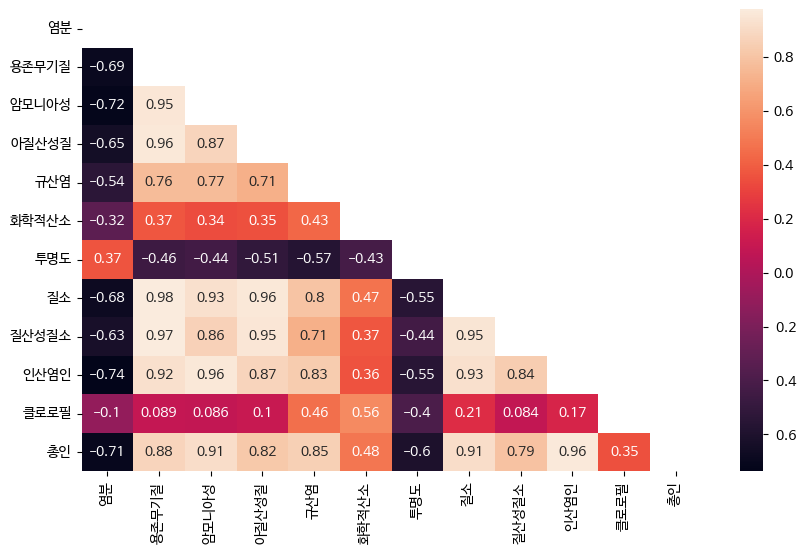

In [ ]:
# PCA
scaler= MinMaxScaler()
df_corr[df_corr.columns] = scaler.fit_transform(df_corr[df_corr.columns])
corr = df_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(10,6))
sns.heatmap(data = df_corr.corr(), annot=True, mask=mask)

In [ ]:
corr = df_corr.corr(method='pearson')
corr_unstack = corr.unstack()
df_temp = pd.DataFrame(corr_unstack['화학적산소'].sort_values(ascending=False), columns=['화학적산소'])
df_temp.style.background_gradient(cmap='Blues')

,화학적산소
화학적산소,1.000000
클로로필,0.558253
총인,0.482285
질소,0.469735
규산염,0.428771
용존무기질,0.367860
질산성질소,0.367663
인산염인,0.359678
아질산성질,0.352422
암모니아성,0.338660


In [ ]:
# feataure_train_pca = feature_train[["용존무기질", "암모니아성", "아질산성질", "인산염인"]]
feataure_train_pca = feature_train[["label", "target"]]

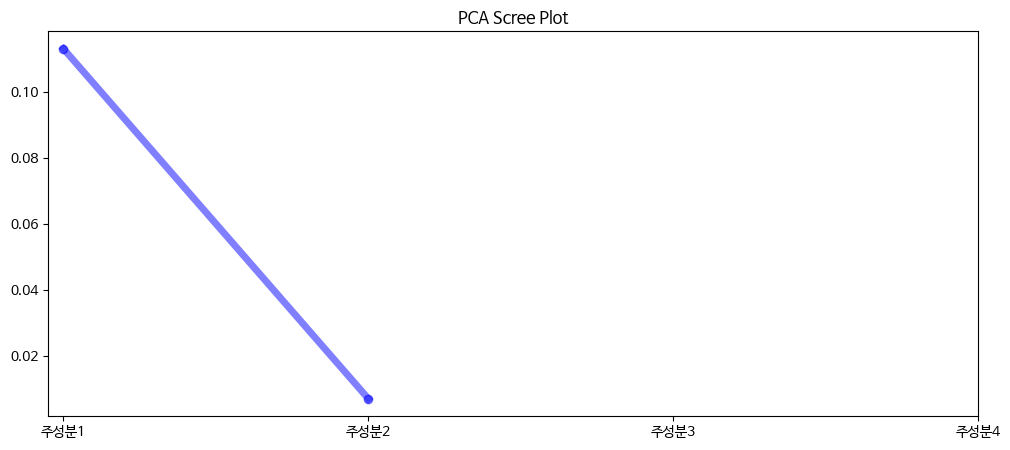

In [ ]:
from sklearn.decomposition import PCA

# PCA 객체 생성 후 학습
pca = PCA(random_state = 1004)
pca.fit(feataure_train_pca)

# 주성분 Scree Plot
plt.figure(figsize = (12, 5))
plt.plot(pca.explained_variance_, marker = 'o', color = 'blue', alpha = 0.5, linewidth = 5)
plt.xticks(ticks = [0, 1, 2, 3,], labels = ['주성분1', '주성분2', '주성분3', '주성분4'])
plt.title('PCA Scree Plot');

[0.94112262 0.05887738]


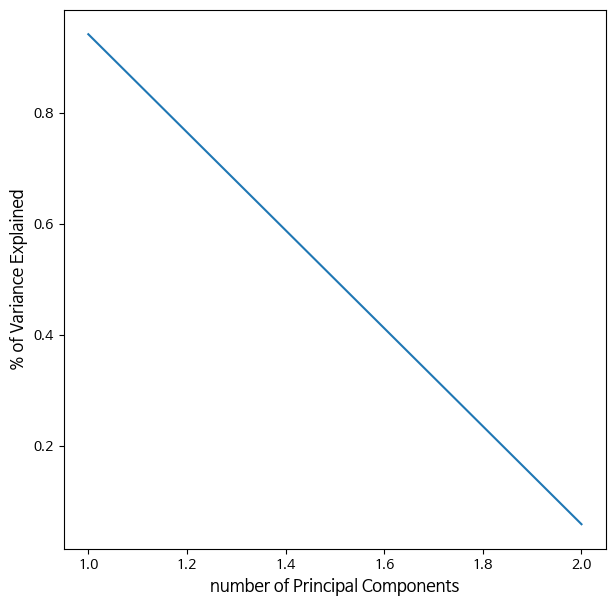

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(random_state=1004)
pca.fit_transform(feataure_train_pca)
print(pca.explained_variance_ratio_)

plt.rcParams['figure.figsize'] = (7, 7)
plt.plot(range(1, feataure_train_pca.shape[1]+1), pca.explained_variance_ratio_)
plt.xlabel("number of Principal Components", fontsize=12)
plt.ylabel("% of Variance Explained", fontsize=12)
plt.show()

## Dimensionality Reduction with n_components=2
pca = PCA(n_components=2, random_state=1004)
iris_pca = pca.fit_transform(feataure_train_pca)

## Regressor

In [ ]:
iris_pca_df = pd.DataFrame({
    'pc_1': iris_pca[:, 0]})
    # 'pc_2': iris_pca[:, 1]}) # numpy broadcasting

In [ ]:
# feature_train=feature_train.drop(["용존무기질", "암모니아성", "아질산성질", "인산염인"], axis = 1)
feature_train=feature_train.drop(["label", "target"], axis = 1)
feature_train['pc_1'] = iris_pca_df['pc_1']
# feature_train['pc_2'] = iris_pca_df['pc_2']
feature_train

,염분,용존무기질,암모니아성,아질산성질,규산염,투명도,질소,질산성질소,인산염인,클로로필,총인,pc_1
0,0.874278,0.070029,0.047354,0.115016,0.157550,0.179959,0.174565,0.076880,0.116979,0.168033,0.180867,0.506744
1,0.877626,0.068006,0.048350,0.110846,0.158033,0.187885,0.171915,0.073884,0.115594,0.167288,0.179408,0.506744
2,0.794831,0.021972,0.039735,0.031699,0.069234,0.153606,0.093557,0.019465,0.086292,0.235498,0.120569,-0.093173
3,0.797463,0.038081,0.062674,0.046357,0.093580,0.154491,0.111288,0.030135,0.115196,0.232383,0.155659,-0.093173
4,0.802159,0.059499,0.093463,0.065681,0.127013,0.157202,0.135319,0.044194,0.154347,0.228771,0.204324,-0.093173
...,...,...,...,...,...,...,...,...,...,...,...,...
1394,0.953350,0.186092,0.268842,0.146136,0.198603,0.241922,0.195247,0.134053,0.280017,0.156220,0.307045,0.106800
1395,0.937527,0.159851,0.224138,0.124542,0.179840,0.346393,0.177331,0.119998,0.241713,0.103871,0.255470,0.106800
1396,0.955897,0.175548,0.249724,0.135899,0.190711,0.290568,0.186505,0.129131,0.266580,0.122177,0.284208,0.106800
1397,0.949530,0.142287,0.197335,0.111211,0.164471,0.367253,0.160056,0.108948,0.213003,0.098762,0.226912,0.106800


In [1]:
# feature_train = feature_train.drop('target', axis=1)
# feature_train = feature_train.drop(['label'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature_train, target, train_size=0.75, test_size=0.25, random_state=201804217)

### RandomForest

In [ ]:
rf = RandomForestRegressor(random_state = 28)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
R2 = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
print('R2: ', R2)
print('MAE: ', MAE)
print(rf.score(X_test, y_test))

<ipython-input-34-acde3346fd23>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


R2:  0.8599721719129174
MAE:  0.09076319684168559
0.8599721719129174


In [ ]:
feature_train

,염분,용존무기질,암모니아성,아질산성질,규산염,투명도,질소,질산성질소,인산염인,클로로필,총인,pc_1
0,0.874278,0.070029,0.047354,0.115016,0.157550,0.179959,0.174565,0.076880,0.116979,0.168033,0.180867,0.506744
1,0.877626,0.068006,0.048350,0.110846,0.158033,0.187885,0.171915,0.073884,0.115594,0.167288,0.179408,0.506744
2,0.794831,0.021972,0.039735,0.031699,0.069234,0.153606,0.093557,0.019465,0.086292,0.235498,0.120569,-0.093173
3,0.797463,0.038081,0.062674,0.046357,0.093580,0.154491,0.111288,0.030135,0.115196,0.232383,0.155659,-0.093173
4,0.802159,0.059499,0.093463,0.065681,0.127013,0.157202,0.135319,0.044194,0.154347,0.228771,0.204324,-0.093173
...,...,...,...,...,...,...,...,...,...,...,...,...
1394,0.953350,0.186092,0.268842,0.146136,0.198603,0.241922,0.195247,0.134053,0.280017,0.156220,0.307045,0.106800
1395,0.937527,0.159851,0.224138,0.124542,0.179840,0.346393,0.177331,0.119998,0.241713,0.103871,0.255470,0.106800
1396,0.955897,0.175548,0.249724,0.135899,0.190711,0.290568,0.186505,0.129131,0.266580,0.122177,0.284208,0.106800
1397,0.949530,0.142287,0.197335,0.111211,0.164471,0.367253,0.160056,0.108948,0.213003,0.098762,0.226912,0.106800


In [ ]:
# train 성능

y_pred = rf.predict(feature_train)
R2_train = r2_score(target, y_pred)
MAE_train = mean_absolute_error(target, y_pred)
print('R2: ', R2_train)
print('MAE: ', MAE_train)

R2:  0.9566201441053284
MAE:  0.04720548237585419


In [ ]:
pd.DataFrame({"train": [R2_train, MAE_train], "test":[R2, MAE]}, index=["R2", "MAE"])

,train,test
R2,0.956620,0.859972
MAE,0.047205,0.090763


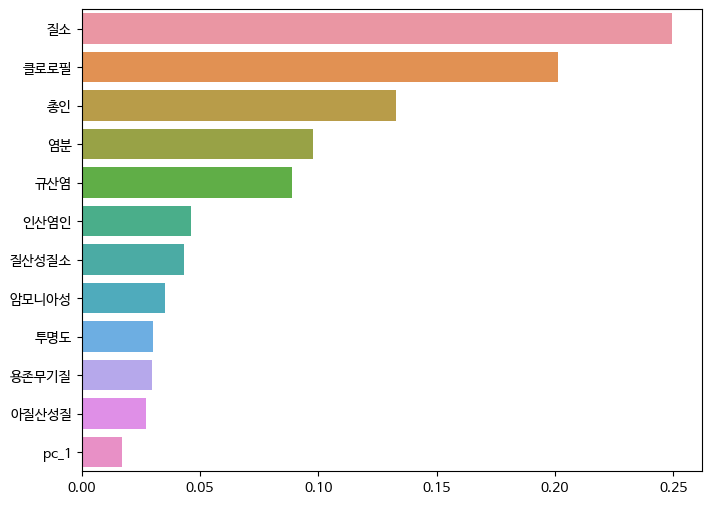

In [ ]:
ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

ftr_top = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()


# pd.DataFrame(rf.feature_importances_, index=feature)

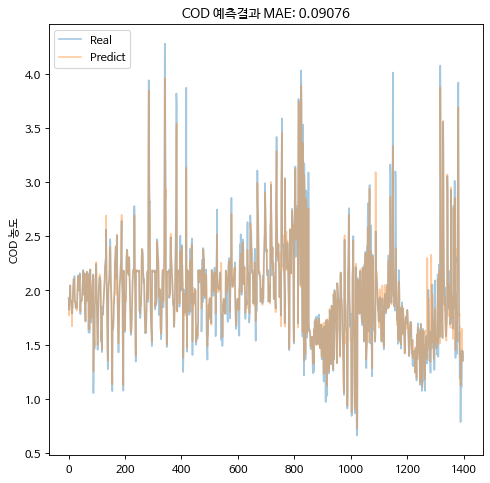

In [ ]:
plt.figure(dpi=80)
plt.title('COD 예측결과 MAE: ' + str(MAE)[:7])
plt.ylabel('COD 농도')
plt.plot(np.array(target), alpha = 0.4, label = 'Real')
plt.plot(rf.predict(feature_train), alpha = 0.4, label = 'Predict')
plt.legend()
plt.show()

In [ ]:
# 하이퍼파라미터 튜닝
from random import randint
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import loguniform


params ={
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

grid_cv = GridSearchCV(rf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=28), n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [100]})

In [ ]:
print(f"Best Param: {grid_cv.best_params_}")
max_depth = grid_cv.best_params_['max_depth']
min_samples_leaf = grid_cv.best_params_['min_samples_leaf']
min_samples_split = grid_cv.best_params_['min_samples_split']
n_estimators = grid_cv.best_params_['n_estimators']

Best Param: {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error


# 데이터셋과 타겟 변수 준비
X =  np.array(feature_train)# 입력 변수 데이터
y =  np.array(target)# 타겟 변수 데이터

# K-fold 교차 검증 객체 생성
k = 5  # K 값 설정 (예: 5-fold 교차 검증)
kf = KFold(n_splits=k, shuffle=True, random_state=201804217)

# 모델 및 평가 지표 초기화
mae_scores = []  # 각 폴드의 MSE를 저장할 리스트
r2_scores = []

# K-fold 검증 과정으로 실제 랜덤 포레스트 모델을 학습하여 정확도 평균을 내는 방법
for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    rf = RandomForestRegressor(n_estimators= n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, random_state = 28)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    # 평가 지표 계산 (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)
    R2 = r2_score(y_test, y_pred)
    r2_scores.append(R2)


# 각 폴드의 MSE 출력
for i, mae in enumerate(mae_scores):
    print(f"Fold {i+1} MAE: {mae}")
for i, r2 in enumerate(r2_scores):
    print(f"Fold {i+1} r2: {r2}")

# 평균 MSE 계산
average_mae = sum(mae_scores) / len(mae_scores)
average_r2 = sum(r2_scores) / len(r2_scores)
print("Average MAE:", average_mae)
print("Average r2:", average_r2)

<ipython-input-141-4ea5a2e3ead7>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
<ipython-input-141-4ea5a2e3ead7>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
<ipython-input-141-4ea5a2e3ead7>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
<ipython-input-141-4ea5a2e3ead7>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
<ipython-input-141-4ea5a2e3ead7>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

Fold 1 MAE: 0.10527034301970506
Fold 2 MAE: 0.13155188230455636
Fold 3 MAE: 0.09638726905432696
Fold 4 MAE: 0.11505091838800785
Fold 5 MAE: 0.10411125751294631
Fold 1 r2: 0.8542063055352258
Fold 2 r2: 0.7604234631337214
Fold 3 r2: 0.8372026041703209
Fold 4 r2: 0.8231911809369592
Fold 5 r2: 0.852219693486235
Average MAE: 0.1104743340559085
Average r2: 0.8254486494524926


### LGBM

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature_train, target, train_size=0.75, test_size=0.25, random_state=201804217)

In [ ]:
from lightgbm import LGBMRegressor

lg = LGBMRegressor(random_state = 28)
lg.fit(X_train, y_train)

y_pred = lg.predict(X_test)
R2 = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
print('R2: ', R2)
print('MAE: ', MAE)
print(lg.score(X_test, y_test))

R2:  0.8808321154975793
MAE:  0.09476547934217053
0.8808321154975793


In [ ]:
# train 성능

y_pred = lg.predict(feature_train)
R2_train = r2_score(target, y_pred)
MAE_train = mean_absolute_error(target, y_pred)
print('R2: ', R2_train)
print('MAE: ', MAE_train)

R2:  0.9562419725077719
MAE:  0.05056599224194011


In [ ]:
pd.DataFrame({"train": [R2_train, MAE_train], "test":[R2, MAE]}, index=["R2", "MAE"])

,train,test
R2,0.956242,0.880832
MAE,0.050566,0.094765


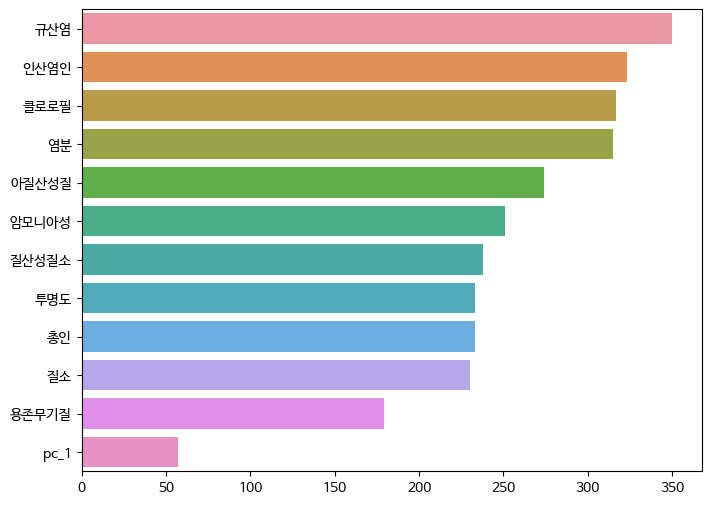

In [ ]:
ftr_importances_values = lg.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

ftr_top = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()


# pd.DataFrame(rf.feature_importances_, index=feature)

In [ ]:
# 하이퍼파라미터 튜닝
from random import randint
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import loguniform


params ={
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

grid_cv = GridSearchCV(lg, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train,y_train)

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Unknown parameter: min_samples_split


GridSearchCV(cv=2, estimator=LGBMRegressor(random_state=28), n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [100]})

In [ ]:
print(f"Best Param: {grid_cv.best_params_}")
max_depth = grid_cv.best_params_['max_depth']
min_samples_leaf = grid_cv.best_params_['min_samples_leaf']
min_samples_split = grid_cv.best_params_['min_samples_split']
n_estimators = grid_cv.best_params_['n_estimators']

Best Param: {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error


# 데이터셋과 타겟 변수 준비
X =  np.array(feature)# 입력 변수 데이터
y =  np.array(target)# 타겟 변수 데이터

# K-fold 교차 검증 객체 생성
k = 5  # K 값 설정 (예: 5-fold 교차 검증)
kf = KFold(n_splits=k, shuffle=True, random_state=201804217)

# 모델 및 평가 지표 초기화
mae_scores = []  # 각 폴드의 MSE를 저장할 리스트
r2_scores = []


# K-fold 검증 과정으로 실제 랜덤 포레스트 모델을 학습하여 정확도 평균을 내는 방법
for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lg = LGBMRegressor(n_estimators= n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, random_state = 28)
    lg.fit(X_train, y_train)
    y_pred = lg.predict(X_test)

    # 평가 지표 계산 (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)
    R2 = r2_score(y_test, y_pred)
    r2_scores.append(R2)

# 각 폴드의 MSE 출력
for i, mae in enumerate(mae_scores):
    print(f"Fold {i+1} MAE: {mae}")
for i, r2 in enumerate(r2_scores):
    print(f"Fold {i+1} r2: {r2}")

# 평균 MSE 계산
average_mae = sum(mae_scores) / len(mae_scores)
average_r2 = sum(r2_scores) / len(r2_scores)
print("Average MAE:", average_mae)
print("Average r2:", average_r2)

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Unknown parameter: min_samples_split


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Unknown parameter: min_samples_split


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Unknown parameter: min_samples_split
Fold 1 MAE: 0.07776099418971431
Fold 2 MAE: 0.09814960980876446
Fold 3 MAE: 0.07803014127281303
Fold 4 MAE: 0.09517908940123439
Fold 5 MAE: 0.09182970917845434
Fold 1 r2: 0.9268362942866992
Fold 2 r2: 0.8649798383474228
Fold 3 r2: 0.8945997358816963
Fold 4 r2: 0.8652520658042602
Fold 5 r2: 0.9001908258241389
Average MAE: 0.0881899087701961
Average r2: 0.8903717520288434


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### CatBoost

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature_train, target, train_size=0.75, test_size=0.25, random_state=201804217)

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor(random_state = 28)
cat.fit(X_train, y_train)

y_pred = cat.predict(X_test)
R2 = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
print('R2: ', R2)
print('MAE: ', MAE)
print(cat.score(X_test, y_test))

Learning rate set to 0.041254
0:	learn: 0.4636601	total: 4.66ms	remaining: 4.65s
1:	learn: 0.4545278	total: 10.8ms	remaining: 5.38s
2:	learn: 0.4464822	total: 13.8ms	remaining: 4.58s
3:	learn: 0.4381601	total: 16.6ms	remaining: 4.13s
4:	learn: 0.4303178	total: 18.8ms	remaining: 3.74s
5:	learn: 0.4223740	total: 21ms	remaining: 3.47s
6:	learn: 0.4145214	total: 23.2ms	remaining: 3.29s
7:	learn: 0.4072260	total: 25.4ms	remaining: 3.14s
8:	learn: 0.4001467	total: 27.5ms	remaining: 3.03s
9:	learn: 0.3932259	total: 29.7ms	remaining: 2.94s
10:	learn: 0.3868773	total: 31.9ms	remaining: 2.87s
11:	learn: 0.3805938	total: 34.1ms	remaining: 2.81s
12:	learn: 0.3746940	total: 36.3ms	remaining: 2.76s
13:	learn: 0.3687824	total: 38.5ms	remaining: 2.71s
14:	learn: 0.3634647	total: 40.6ms	remaining: 2.66s
15:	learn: 0.3580549	total: 42.7ms	remaining: 2.63s
16:	learn: 0.3527767	total: 45ms	remaining: 2.6s
17:	learn: 0.3479381	total: 47.2ms	remaining: 2.57s
18:	learn: 0.3417764	total: 49.8ms	remaining: 2.5

In [ ]:
# train 성능

y_pred = cat.predict(feature_train)
R2_train = r2_score(target, y_pred)
MAE_train = mean_absolute_error(target, y_pred)
print('R2: ', R2_train)
print('MAE: ', MAE_train)

R2:  0.9742738393159716
MAE:  0.03880657524801651


In [ ]:
pd.DataFrame({"train": [R2_train, MAE_train], "test":[R2, MAE]}, index=["R2", "MAE"])

,train,test
R2,0.974274,0.901142
MAE,0.038807,0.079410


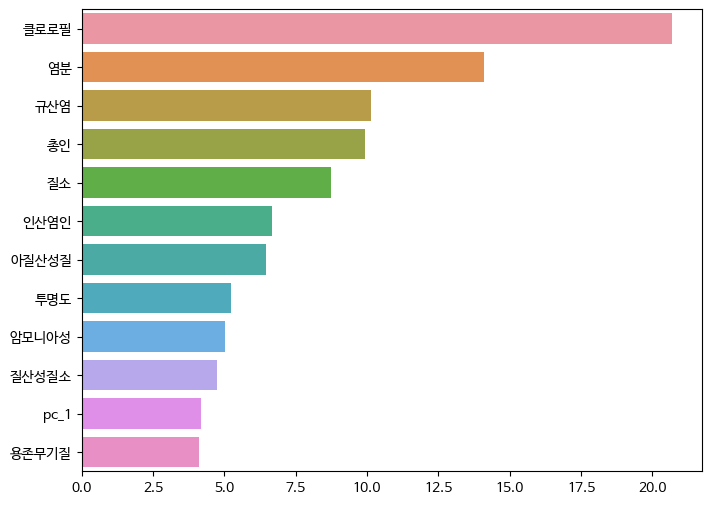

In [ ]:
ftr_importances_values = cat.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=feature_train.columns)

ftr_top = ftr_importances.sort_values(ascending=False)[:24]
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()


# pd.DataFrame(rf.feature_importances_, index=feature)

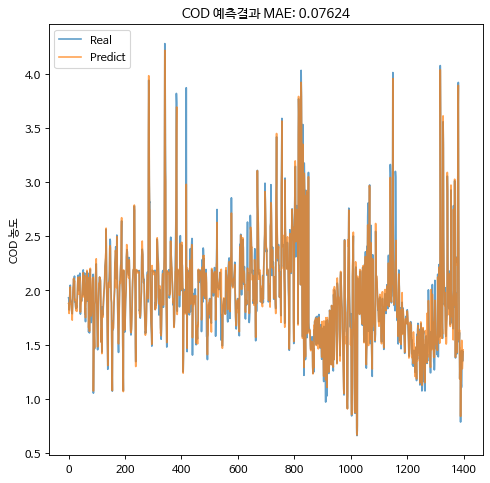

In [ ]:
plt.figure(dpi=80)
plt.title('COD 예측결과 MAE: ' + str(average_mae)[:7])
plt.ylabel('COD 농도')
plt.plot(np.array(target), alpha = 0.7, label = 'Real')
plt.plot(cat.predict(feature_train), alpha = 0.7, label = 'Predict')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error


# 데이터셋과 타겟 변수 준비
X =  np.array(feature)# 입력 변수 데이터
y =  np.array(target)# 타겟 변수 데이터

# K-fold 교차 검증 객체 생성
k = 5  # K 값 설정 (예: 5-fold 교차 검증)
kf = KFold(n_splits=k, shuffle=True, random_state=201804217)

# 모델 및 평가 지표 초기화
mae_scores = []  # 각 폴드의 MSE를 저장할 리스트
r2_scores = []


# K-fold 검증 과정으로 실제 랜덤 포레스트 모델을 학습하여 정확도 평균을 내는 방법
for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    cat = CatBoostRegressor(random_state = 28)
    cat.fit(X_train, y_train)
    y_pred = cat.predict(X_test)

    # 평가 지표 계산 (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)
    R2 = r2_score(y_test, y_pred)
    r2_scores.append(R2)

# 각 폴드의 MSE 출력
for i, mae in enumerate(mae_scores):
    print(f"Fold {i+1} MAE: {mae}")
for i, r2 in enumerate(r2_scores):
    print(f"Fold {i+1} r2: {r2}")

# 평균 MSE 계산
average_mae = sum(mae_scores) / len(mae_scores)
average_r2 = sum(r2_scores) / len(r2_scores)
print("Average MAE:", average_mae)
print("Average r2:", average_r2)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
16:	learn: 0.3522535	total: 41.5ms	remaining: 2.4s
17:	learn: 0.3479415	total: 44ms	remaining: 2.4s
18:	learn: 0.3431657	total: 46.3ms	remaining: 2.39s
19:	learn: 0.3378836	total: 48.6ms	remaining: 2.38s
20:	learn: 0.3327306	total: 50.9ms	remaining: 2.38s
21:	learn: 0.3270145	total: 53.2ms	remaining: 2.37s
22:	learn: 0.3218912	total: 55.4ms	remaining: 2.35s
23:	learn: 0.3174828	total: 57.6ms	remaining: 2.34s
24:	learn: 0.3140632	total: 59.8ms	remaining: 2.33s
25:	learn: 0.3110944	total: 64.4ms	remaining: 2.41s
26:	learn: 0.3072739	total: 68.9ms	remaining: 2.48s
27:	learn: 0.3039542	total: 74.6ms	remaining: 2.59s
28:	learn: 0.3008792	total: 77.8ms	remaining: 2.61s
29:	learn: 0.2976940	total: 80.1ms	remaining: 2.59s
30:	learn: 0.2944587	total: 84.1ms	remaining: 2.63s
31:	learn: 0.2912627	total: 86.4ms	remaining: 2.61s
32:	learn: 0.2885958	total: 88.8ms	remaining: 2.6s
33:	learn: 0.2860381	total: 91.1ms	remaining: 2.59s
34:	learn: 0.2835861	total: 93.5m

In [ ]:
pd.DataFrame({"train": [R2_train, MAE_train], "test":[average_r2, average_mae]}, index=["R2", "MAE"])

,train,test
R2,0.974274,0.911900
MAE,0.038807,0.076249


In [2]:
# plt.figure(dpi=80)
# plt.title('COD 예측결과 MAE: ' + str(average_mae)[:7])
# plt.ylabel('COD 농도')
# plt.plot(np.array(target), alpha = 0.7, label = 'Real')
# plt.plot(cat.predict(y_train), alpha = 0.7, label = 'Predict')
# plt.legend()
# plt.show()